In [9]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Descrição geral dos valores de compra

In [44]:
# Carregando o dataset
df = pd.read_csv(r'C:\Users\Luca Flores\Downloads\Dataset questão 1.csv',
                 encoding='latin1', sep=';')

### Verificação dos dados

In [33]:

# Verificar tipos de dados e valores ausentes
print("\nInformações do dataset:")
print(df.info())

print("\nVerificando valores ausentes:")
print(df.isnull().sum())



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Cliente       50 non-null     object 
 1   Idade            50 non-null     int64  
 2   Localização      50 non-null     object 
 3   Canal_Aquisição  50 non-null     object 
 4   Produto          50 non-null     object 
 5   Valor_Compra     50 non-null     float64
 6   Data_Compra      50 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB
None

Verificando valores ausentes:
ID_Cliente         0
Idade              0
Localização        0
Canal_Aquisição    0
Produto            0
Valor_Compra       0
Data_Compra        0
dtype: int64


In [45]:
df['Valor_Compra'].describe()


count      50.000000
mean      913.724400
std       392.407765
min        71.320000
25%       597.560000
50%       962.985000
75%      1237.260000
max      1495.890000
Name: Valor_Compra, dtype: float64

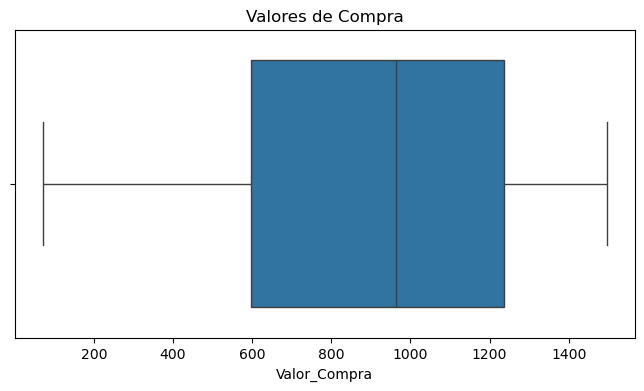

In [43]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Valor_Compra'])
plt.title('Valores de Compra')
plt.show()

Não possui valores  negativos nem outliers

### Combinações mais frequentes produto x local

In [36]:
# Agrupando por localização e produto
compras_por_local = df.groupby(['Localização', 'Produto']).size().reset_index(name='Quantidade')

# Cinco combinações mais comuns
print(compras_por_local.sort_values('Quantidade', ascending=False).head(5))


     Localização    Produto  Quantidade
4       Curitiba  Produto B           8
6   Porto Alegre  Produto B           7
3       Curitiba  Produto A           5
16     São Paulo  Produto D           4
7   Porto Alegre  Produto C           4


In [ ]:

# Plotar um gráfico de barras para visualizar a relação

plt.figure(figsize=(14,6))
sns.barplot(data=compras_por_local, x='Localização', y='Quantidade', hue='Produto')
plt.title('Quantidade de compras por Localização e Produto')
plt.ylabel('Quantidade de Compras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Canal de aquisição mais rentável

    Canal_Aquisição  Valor_Compra
2          Orgânico      12441.08
3              Pago       9994.17
0  E-mail Marketing       8151.95
4     Redes Sociais       7620.52
1         Indicação       7478.50


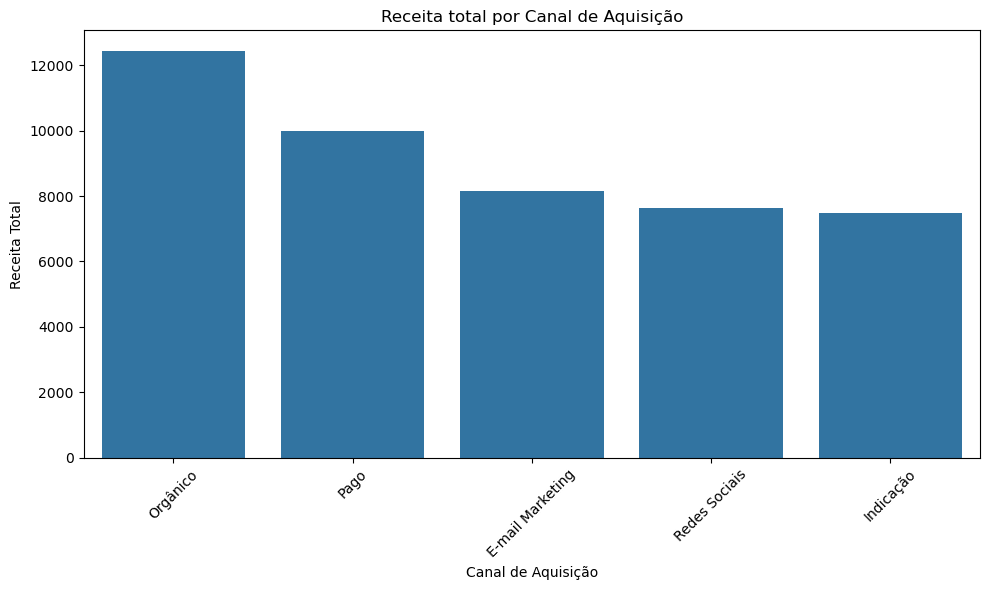

In [ ]:
# agrupando por canal de aquisição e somando os valores de compra
receita_por_canal = df.groupby('Canal_Aquisição')['Valor_Compra'].sum().reset_index()
# Ordenando do maior para o menor
receita_por_canal = receita_por_canal.sort_values('Valor_Compra', ascending=False)

print(receita_por_canal)

# Visualização
plt.figure(figsize=(10,6))
sns.barplot(data=receita_por_canal, x='Canal_Aquisição', y='Valor_Compra')
plt.title('Receita total por Canal de Aquisição')
plt.ylabel('Receita Total')
plt.xlabel('Canal de Aquisição')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()